In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import numpy as np
from tkinter import *

In [6]:
first = {}
k = {}
e = {}
wenglish =[]
cchinese = []
chinese = []
y = []

wordfile = open("E:/2'2 imprtant docs/words(1).txt", "r" , encoding="utf8")
readLines = wordfile.readlines()

for line in readLines:
    eng,other = line.split(' ',1)
    y.append(other.split('.',1)[-1]) 
    wc = y[0]
    chin=y[-1]
    e[eng]=wc
    k[eng]=chin
    first[chin]=eng
    wenglish.append(eng)
    cchinese.append(chin)
    def convortor(s):
        strl = ""
        for element in s:
            strl += element
        return strl

words = convortor(wenglish)
  

In [7]:
def wsearch():
    matches.delete(0,END)
    word5.delete(0,END)
    word2.delete(0,END)
    word3.delete(0,END)
    word4.delete(0,END)
    word = word1.get()
    if word in words:
        count=0
        for i in range (len(wenglish)):
            if re.match(word.lower(),wenglish[i].lower()):
                word1_value = wenglish[i]
                count = count +1
                matches.insert(END,word1_value)
        word1_value = 'total matched words are :'+str(count)
        word5.insert(0,word1_value)
    else:
        count =0
        word = word1.get()
         
        for j in range(len(cchinese)):
            if re.search(word,cchinese[j]):
                word1_value = cchinese[j]
                count=count+1
                matches.insert(END,first[word1_value])
                word1_value = "total matched words are :"+str(count)
                word5.insert(0,word1_value)            
#Select word fuction
def wselect():
    word2.delete(0,END)
    word3.delete(0,END)
    word4.delete(0,END)
    
    pp = matches.curselection()
    
    if(len(pp)==0):
        matches.delete(0,END)
        matches.insert(END,'No words selected')
    else:
        mm= matches.get(pp)
        word1_value = k[mm]
        word4.insert(0,word1_value)
        word1_value = e[mm]
        word3.insert(0,word1_value)
        word1_value=mm
        word2.insert(0,word1_value)
        

In [8]:
def otherword():
    matches.delete(0,END)
    word1.delete(0,END)
    word2.delete(0,END)
    word3.delete(0,END)
    word4.delete(0,END)
    word5.delete(0,END)
    
    wsearch()
    wselect()

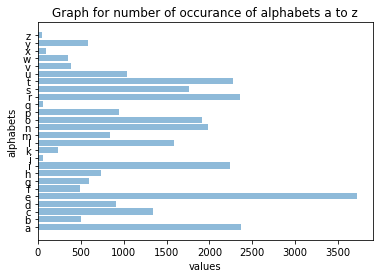

In [13]:
def wgraph():
    chars = defaultdict(int)
    for letter in words.lower():
        chars[letter] +=1
        
    letters = ('a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z')
    
    y_pos =  np.arange(len(letters))
    values = [chars['a'],chars['b'],chars['c'],chars['d'],chars['e'],chars['f'],chars['g'],chars['h'],chars['i'],chars['j'],chars['k']
              ,chars['l'],chars['m'],chars['n'],chars['o'],chars['p'],chars['q'],chars['r'],chars['s'],chars['t'],chars['u'],chars['v']
              ,chars['w'],chars['x'],chars['y'],chars['z'],]
    plt.barh(y_pos,values,align='center',alpha=0.5)
    plt.yticks(y_pos,letters)
    plt.xlabel('values')
    plt.ylabel('alphabets')
    plt.title('Graph for number of occurance of alphabets a to z')
    plt.show()
    

#design GUI
root = Tk()
root.resizable(False,False)
root.iconbitmap('E:/Oxygen-Icons.org-Oxygen-Apps-accessories-dictionary.ico')
root.title("English - Chinese Dictionary")

label1=Label(root,text='Chetona - ',bg="white")
label1.grid(row=0,column=0,columnspan=5,padx=200)

word1_value=StringVar()
word1= Entry(root,textvariable=word1_value,borderwidth=5,width=40)
word1.grid(row=2,column=0,sticky=W)
word1.insert(0,'Enter a Word')

word2=Entry(root,borderwidth=5,width=40)
word2.grid(row=6,column=0,sticky=W)

word3=Entry(root,borderwidth=5,width=11)
word3.grid(row=6,column=1,sticky=E)

word4=Entry(root,borderwidth=10,width=40)
word4.grid(row=6,column=2,sticky=E)

word5=Entry(root,borderwidth=5,width=40)
word5.grid(row=5,column=0,sticky=W)

frm = Frame(root)
frm.grid(row=3,column=0,columnspan=3)

scrollbar = Scrollbar(frm,orient="vertical")
scrollbar.pack(side=RIGHT,fill=Y)

matches = Listbox(frm,width=70,height=20,yscrollcommand=scrollbar.set,font=("Times New Roman",12),borderwidth=5)
matches.pack(expand=True,fill=Y)

scrollbar.config(command=matches.yview)

button1 = Button(root,text='Search',command=wsearch,bg='orange').grid(row=2,column=1,sticky=E,ipadx=20)
button2 = Button(root,text='Clear',command=otherword,bg='green').grid(row=7,column=1,sticky=E,ipadx=20)
button3 = Button(root,text='Select',command=wselect,bg='yellow').grid(row=7,column=2,rowspan=2,sticky=E,ipadx=20,ipady=20)
button4 = Button(root,text='Graph',command=wgraph,bg='blue').grid(row=8,column=1,sticky=E,ipadx=17)

root.mainloop()
